In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [10]:
import pickle
with open('data/labeled_df.pkl', 'rb') as f:
    labeled_df = pickle.load(f)

with open('data/test_xy_for_eval.pkl', 'rb') as f:
    x_test, y_test = pickle.load(f)

with open('data/pseudo_labeled_df.pkl', 'rb') as f:
    unlabeled_df = pickle.load(f)

In [11]:
x_labeled = labeled_df.drop(columns=["label", "source"])
y_labeled = labeled_df["label"]

x_unlabeled = unlabeled_df.drop(columns=["label", "source"])
y_pseudo = unlabeled_df["label"]


In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

omni_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=200,
)

x_train, x_test, y_train, y_test = train_test_split(x_unlabeled, y_pseudo, test_size=0.2)

omni_model.fit(x_train, y_train)

# Predict on the test set
y_pred = omni_model.predict(x_test)

print("Step 0: Omni model (Neural Net)")
print(classification_report(y_test, y_pred))

Step 0: Omni model (Neural Net)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       1.00      0.98      0.99     14959
         3.0       1.00      1.00      1.00     30205
         4.0       0.94      1.00      0.97      5045
         5.0       1.00      1.00      1.00     17732

    accuracy                           0.99     67943
   macro avg       0.79      0.79      0.79     67943
weighted avg       0.99      0.99      0.99     67943



c:\Users\lucch\Desktop\thesis-datasec\thesis\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\lucch\Desktop\thesis-datasec\thesis\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\lucch\Desktop\thesis-datasec\thesis\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

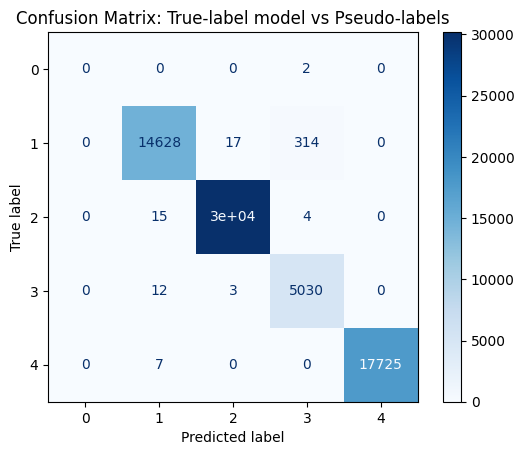

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot(cmap='Blues')
plt.title("Confusion Matrix: omnipot self consistency model eval")
plt.show()


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

model1 = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=200,
    random_state=42
)
model1.fit(x_labeled, y_labeled)

# Predict on unlabeled (pseudo-labeled) data
y_pred_unlabeled = model1.predict(x_unlabeled)

print("Step 1: True-label model vs Pseudo-labels (Neural Net)")
print(classification_report(y_pseudo, y_pred_unlabeled))

cm1 = confusion_matrix(y_pseudo, y_pred_unlabeled)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot(cmap='Blues')
plt.title("Confusion Matrix: True-label model vs Pseudo-labels")
plt.show()

Step 1: True-label model vs Pseudo-labels (Neural Net)
              precision    recall  f1-score   support

         0.0       0.00      1.00      0.00         1
         1.0       0.00      0.00      0.00         6
         2.0       0.46      0.96      0.62     73931
         3.0       0.00      0.00      0.00    151722
         4.0       0.06      0.11      0.08     25396
         5.0       0.00      0.00      0.00     88656

    accuracy                           0.22    339712
   macro avg       0.09      0.34      0.12    339712
weighted avg       0.11      0.22      0.14    339712



In [ ]:
model2 = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=200,
    random_state=42
)
model2.fit(x_unlabeled, y_pseudo)

# Predict on swapped test set
y_pred_labeled = model2.predict(x_test)

print("Step 2: Pseudo-label model vs True labels (Neural Net)")
print(classification_report(y_test, y_pred_labeled))
cm2 = confusion_matrix(y_test, y_pred_labeled)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot(cmap='Blues')
plt.title("Confusion Matrix: Pseudo-label model vs True labels")
plt.show()

Step 2: Pseudo-label model vs True labels (Neural Net)
              precision    recall  f1-score   support

           0       0.95      0.13      0.23      2736
           1       0.93      0.79      0.85     25773
           2       0.91      0.92      0.91     50227
           3       0.11      0.96      0.20       385
           4       0.99      0.99      0.99     31733
           5       0.13      0.92      0.23       458

    accuracy                           0.89    111312
   macro avg       0.67      0.79      0.57    111312
weighted avg       0.93      0.89      0.90    111312

